In [1]:
import numpy as np
from classy import Class
from SeparateUniverseGrowthResponse import *
from SeparateUniverseGrowthResponseTest import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
cls = Class()
cls.set({'output':'mTk, vTk', 'z_pk': 1.e6, 'extra_metric_transfer_functions':'yes'})
cls.compute()

In [3]:
sugr = SeparateUniverseGrowthResponse(cls, quiet = True)
sugr2 = SeparateUniverseGrowthResponse2(cls, quiet = True)

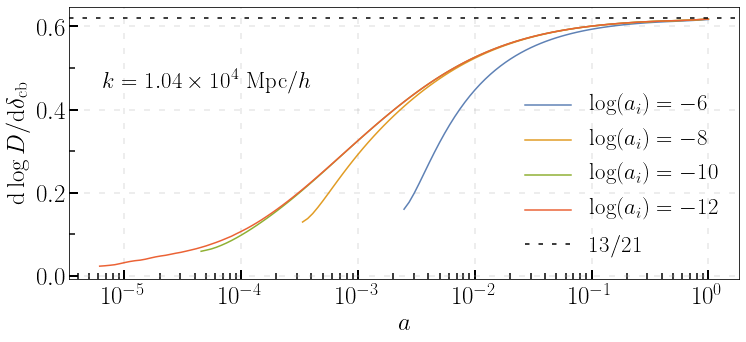

In [4]:
#
# Test initial times
#
Rloga, Rs = [], []
logais = [-6, -8, -10, -12]
for tlogai in logais :
    tRloga, tR = sugr.getGrowthResponse(10, tlogai, dloga = 1.e-1, nstep = 100, rtol = 1.e-3, atol = 1.e-9)
    Rloga.append(tRloga)
    Rs.append(tR)
Rloga = np.array(Rloga)
Rs = np.array(Rs)
#
# Plots
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_xscale('log')
for tlogai, tloga, tR in zip(logais, Rloga, Rs) :
    ax.plot(np.exp(tloga), tR, label = '$\log(a_i) = %d$' % tlogai)
ax.text(0.05, 0.7, r'$k = %.2f \times 10^4\ \mathrm{Mpc}/h$' % (cls.get_transfer(1.)['k (h/Mpc)'][10] * 1.e4), transform = ax.transAxes, size = 23)
ax.axhline(13. / 21., color = 'black', dashes = (3, 6), label = '$13/21$')
ax.legend();
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2));
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1));
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10, subs=[1.0]));
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10, subs=[1., 2., 3., 4., 5., 6., 7., 8., 9.]));
ax.grid(dashes = (4, 6));
ax.set_ylabel('$\mathrm{d} \log D / \mathrm{d} \delta_{\mathrm{cb}}$');
ax.set_xlabel('$a$');

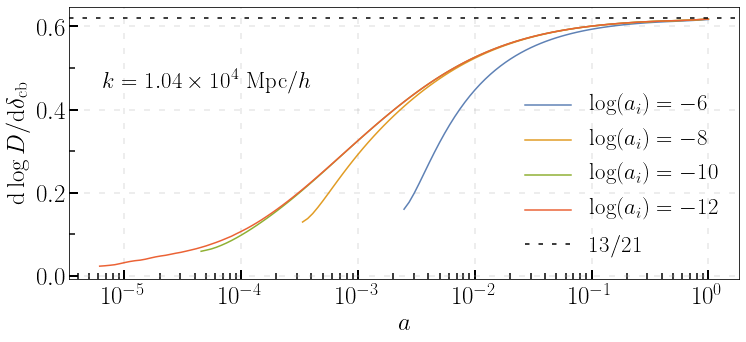

In [5]:
#
# Test initial times
#
Rloga, Rs = [], []
logais = [-6, -8, -10, -12]
for tlogai in logais :
    tRloga, tR = sugr2.getGrowthResponse(10, tlogai, dloga = 1.e-1, nstep = 100, rtol = 1.e-3, atol = 1.e-9)
    Rloga.append(tRloga)
    Rs.append(tR)
Rloga = np.array(Rloga)
Rs = np.array(Rs)
#
# Plots
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_xscale('log')
for tlogai, tloga, tR in zip(logais, Rloga, Rs) :
    ax.plot(np.exp(tloga), tR, label = '$\log(a_i) = %d$' % tlogai)
ax.text(0.05, 0.7, r'$k = %.2f \times 10^4\ \mathrm{Mpc}/h$' % (cls.get_transfer(1.)['k (h/Mpc)'][10] * 1.e4), transform = ax.transAxes, size = 23)
ax.axhline(13. / 21., color = 'black', dashes = (3, 6), label = '$13/21$')
ax.legend();
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2));
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1));
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10, subs=[1.0]));
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10, subs=[1., 2., 3., 4., 5., 6., 7., 8., 9.]));
ax.grid(dashes = (4, 6));
ax.set_ylabel('$\mathrm{d} \log D / \mathrm{d} \delta_{\mathrm{cb}}$');
ax.set_xlabel('$a$');

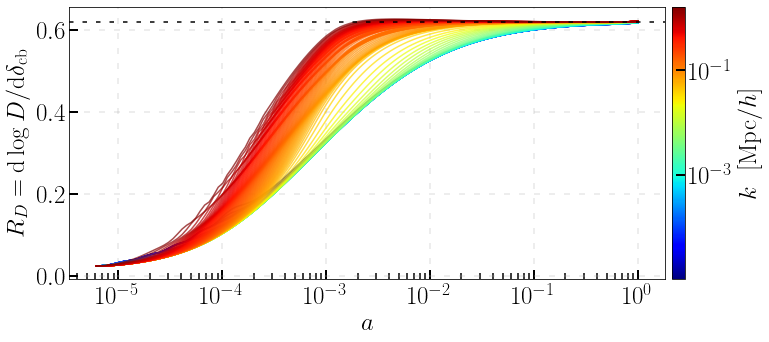

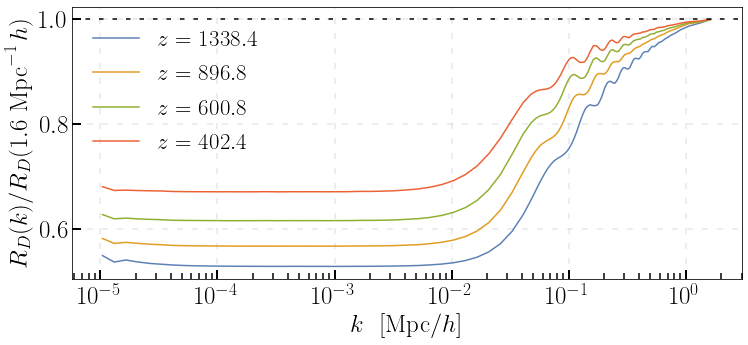

In [6]:
#
# Check scale-dependence at a sample of redshifts
#
Rloga, Rs = [], []
for k_ind in range(len(cls.get_transfer(0.)['k (h/Mpc)'])):
    tRloga, tR = sugr.getGrowthResponse(k_ind, -12, dloga = 1.e-1, nstep = 100, rtol = 1.e-3, atol = 1.e-9)
    Rloga.append(tRloga)
    Rs.append(tR)
Rloga = np.array(Rloga)
Rs = np.array(Rs)
#
# Plots
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_xscale('log')
kk = cls.get_transfer(0.)['k (h/Mpc)']
for tk, tloga, tR in zip(kk, Rloga, Rs) :
    logkrat = np.log(tk / kk[0]) / np.log(kk[-1] / kk[0])
    ax.plot(np.exp(tloga), tR,  color = plt.cm.jet(logkrat), alpha = 0.7);
cmap = mpl.cm.jet;
norm = mpl.colors.LogNorm(vmin= kk[0], vmax = kk[-1]);
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical',
             label='$k\ \ [\mathrm{Mpc}/ h]$', fraction = 0.1, pad = 0.01);
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2));
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1));
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10, subs=[1.0]));
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10, subs=[1., 2., 3., 4., 5., 6., 7., 8., 9.]));
ax.grid(dashes = (4, 6));
ax.axhline(13. / 21., color = 'black', dashes = (3, 6));
ax.set_xlabel('$a$')
ax.set_ylabel('$R_D = \mathrm{d} \log D / \mathrm{d} \delta_{\mathrm{cb}}$');
plt.show()
#
# Ratio plots
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_xscale('log')
for z_ind in [48, 52, 56, 60] :
    ax.plot(cls.get_transfer(0.)['k (h/Mpc)'], Rs[:, z_ind] / Rs[-1, z_ind], label = '$z = %.1f$' % (1. / np.exp(Rloga[-1, z_ind]) - 1.));
ax.legend();
ax.axhline(1., color = 'black', dashes = (3, 6));
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.004));
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.002));
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10, subs=[1.0]));
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10, subs=[1., 2., 3., 4., 5., 6., 7., 8., 9.]));
ax.grid(dashes = (4, 6));
ax.set_xlabel('$k\ \ [\mathrm{Mpc}/h]$')
ax.set_ylabel('$R_D(k) / R_D(1.6\ \mathrm{Mpc}^{-1}\, h)$');
plt.show()

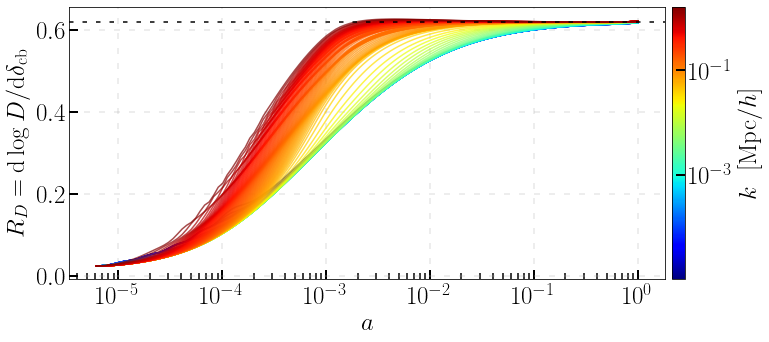

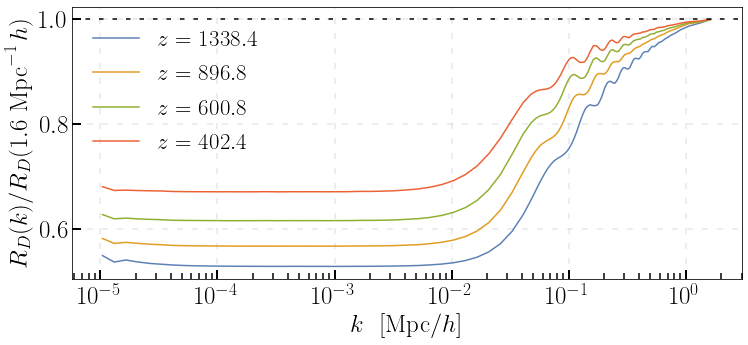

In [7]:
#
# Check scale-dependence at a sample of redshifts
#
Rloga2, Rs2 = [], []
for k_ind in range(len(cls.get_transfer(0.)['k (h/Mpc)'])):
    tRloga, tR = sugr2.getGrowthResponse(k_ind, -12, dloga = 1.e-1, nstep = 100, rtol = 1.e-3, atol = 1.e-9)
    Rloga2.append(tRloga)
    Rs2.append(tR)
Rloga2 = np.array(Rloga)
Rs2 = np.array(Rs)
#
# Plots
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_xscale('log')
kk = cls.get_transfer(0.)['k (h/Mpc)']
for tk, tloga, tR in zip(kk, Rloga2, Rs2) :
    logkrat = np.log(tk / kk[0]) / np.log(kk[-1] / kk[0])
    ax.plot(np.exp(tloga), tR,  color = plt.cm.jet(logkrat), alpha = 0.7);
cmap = mpl.cm.jet;
norm = mpl.colors.LogNorm(vmin= kk[0], vmax = kk[-1]);
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical',
             label='$k\ \ [\mathrm{Mpc}/ h]$', fraction = 0.1, pad = 0.01);
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2));
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1));
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10, subs=[1.0]));
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10, subs=[1., 2., 3., 4., 5., 6., 7., 8., 9.]));
ax.grid(dashes = (4, 6));
ax.axhline(13. / 21., color = 'black', dashes = (3, 6));
ax.set_xlabel('$a$')
ax.set_ylabel('$R_D = \mathrm{d} \log D / \mathrm{d} \delta_{\mathrm{cb}}$');
plt.show()
#
# Ratio plots
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_xscale('log')
for z_ind in [48, 52, 56, 60] :
    ax.plot(cls.get_transfer(0.)['k (h/Mpc)'], Rs2[:, z_ind] / Rs2[-1, z_ind], label = '$z = %.1f$' % (1. / np.exp(Rloga2[-1, z_ind]) - 1.));
ax.legend();
ax.axhline(1., color = 'black', dashes = (3, 6));
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.004));
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.002));
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10, subs=[1.0]));
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10, subs=[1., 2., 3., 4., 5., 6., 7., 8., 9.]));
ax.grid(dashes = (4, 6));
ax.set_xlabel('$k\ \ [\mathrm{Mpc}/h]$')
ax.set_ylabel('$R_D(k) / R_D(1.6\ \mathrm{Mpc}^{-1}\, h)$');
plt.show()

In [ ]:
#
# Ratio plots
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_xscale('log')
for z_ind in [48, 52, 56, 60] :
    ax.plot(cls.get_transfer(0.)['k (h/Mpc)'], Rs[:, z_ind] / Rs[-1, z_ind], label = '$z = %.1f$' % (1. / np.exp(Rloga[-1, z_ind]) - 1.));
ax.legend();
ax.axhline(1., color = 'black', dashes = (3, 6));
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.004));
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.002));
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10, subs=[1.0]));
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10, subs=[1., 2., 3., 4., 5., 6., 7., 8., 9.]));
ax.grid(dashes = (4, 6));
ax.set_xlabel('$k\ \ [\mathrm{Mpc}/h]$')
ax.set_ylabel('$R_D(k) / R_D(1.6\ \mathrm{Mpc}^{-1}\, h)$');
plt.show()

In [25]:
?sugr

Type:           SeparateUniverseGrowthResponse
String form:    <SeparateUniverseGrowthResponse.SeparateUniverseGrowthResponse object at 0x7fd394df1790>
File:           ~/Research/Codes/python/SeparateUniverseGrowthResponse/SeparateUniverseGrowthResponse.py
Docstring:     
Computes time evolutions of the separate universe growth response sourced by linear CDM+baryon perturbations
precomputed in an instance of classy.Class. The growth response can be computed at each wave number tabulated
in the transfer function interpolation tables accessed using Class.get_transfer.  
Init docstring:
Initialization requires an instance of classy.Class that has 'output':'mTk, vTk' and 'z_pk' set early enough
for the initial conditions chosen in the SeparateUniverseGrowthResponse.getGrowthResponse method. The instance of
classy.Class must already be computed.


In [26]:
?sugr.getGrowthResponse

Signature:
sugr.getGrowthResponse(
    k_ind,
    logai=None,
    dloga=0.01,
    nstep=100,
    rtol=0.001,
    atol=1e-10,
)
Docstring:
Numerically integrates the second order ODE for the time evolution of the separate universe
growth response sourced by a linear CDM+baryon mode with wave length self.cls.get_transfer(z)['k (h/Mpc)'][k_ind].
Initial conditions are set during radition domination, so loga should not be set too late or the numerical
solution with have a transcient contribution. 
File:      ~/Research/Codes/python/SeparateUniverseGrowthResponse/SeparateUniverseGrowthResponse.py
Type:      method


In [8]:
thermo = cls.get_thermodynamics()

In [9]:
thermo.keys()

dict_keys(['z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])

In [10]:
th_z = thermo['z']
w_b = thermo['w_b']
c_b2 = thermo['c_b^2']

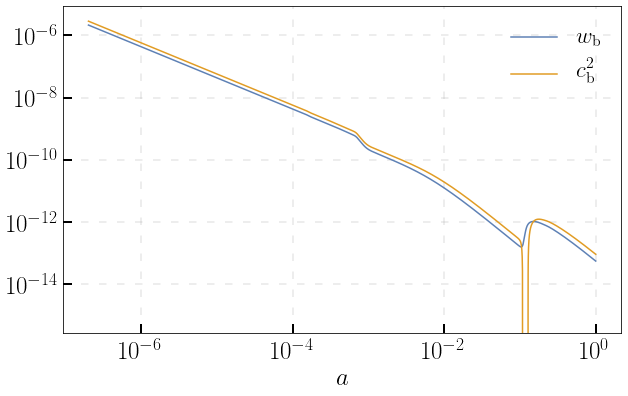

In [32]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_xscale('log')
ax.set_yscale('log')

ax.loglog(1./(1. + th_z), w_b, label = '$w_\mathrm{b}$');
ax.loglog(1./(1. + th_z), c_b2, label = '$c_\mathrm{b}^2$');
ax.legend();

ax.grid(dashes= (5, 7))
ax.set_xlabel('$a$');

In [24]:
c_b2[-1]**0.5

0.0016811641982800692

In [23]:
th_z[-1]

5000000.000000003